In [1]:
#Anurag Athwale 20012263
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import re
import tweepy
import datetime
import time
import nltk
import requests
import time
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import csv
import re
import string
from bs4 import BeautifulSoup  
from selenium import webdriver
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from sklearn.feature_extraction.text import CountVectorizer
from selenium.webdriver.support import expected_conditions as EC
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy.sparse.linalg import svds
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import math
from rouge import Rouge
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

<h2>The below code to get webpage links</h2>

In [3]:
def get_all_links(page_url):
    driver = webdriver.Chrome()
    all_news_links= list()
    all_names=list()
    all_dates=list()
    all_ratings=list()
    all_headings=list()
    all_reviews=list()
    all_staydates=list()
    driver.get(page_url)
    time.sleep(0.5) 

    # Scroll down and click on "Load More" button 100 times to load 1000 articles
    for i in range(70):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)
        try:
            more_link = driver.find_element(By.CSS_SELECTOR, ".load-more")
            driver.execute_script("arguments[0].click();", more_link)
            time.sleep(2)
        except:
            print("No more articles to load")
            break
    
    #get all links of the news
    main_news_link=driver.find_elements(By.CSS_SELECTOR,"div.feature-island-main-block.fi-main-block--unread a.post-block__title__link")
    for i in main_news_link:
        all_news_links.append(i.get_attribute('href'))

    #get the links of news in mini view
    mini_view_links=driver.find_elements(By.CSS_SELECTOR,"div.mini-view article.mini-view__item.mini-item--unread h3.mini-view__item__title a")
    for i in mini_view_links:
        all_news_links.append(i.get_attribute('href'))

    #getting premium links from the middle of the latest news    
    main_premium_links=driver.find_elements(By.CSS_SELECTOR,"article.post-block.post-block--image.post-block--unread.post-block--premium-content header.post-block__header h2.post-block__title a")
    for i in main_premium_links:
        all_news_links.append(i.get_attribute('href'))

    #getting other links from the main page    
    main_links=driver.find_elements(By.CSS_SELECTOR,"article.post-block.post-block--image.post-block--unread header.post-block__header h2.post-block__title a")
    for i in main_links:
        all_news_links.append(i.get_attribute('href'))

    #main articles featured article    
    main_featured_links=driver.find_elements(By.CSS_SELECTOR,"article.post-block.post-block--featured.post-block--unread header.post-block__header h2.post-block__title a")
    for i in main_featured_links:
        all_news_links.append(i.get_attribute('href'))

    driver.quit()
    all_news_links=list(set(all_news_links))
    return all_news_links


In [4]:
page_url = 'https://techcrunch.com/'
all_news_links=get_all_links(page_url)
list[all_news_links]

list[['https://techcrunch.com/2023/04/21/lyft-to-make-significant-cuts-across-ride-hailing-company/', 'https://techcrunch.com/2023/04/26/roku-gains-1-6-million-active-streaming-accounts-in-q1-warns-of-continued-ad-uncertainty/', 'https://techcrunch.com/2023/04/26/lookout-sells-its-consumer-cybersecurity-business-to-f-secure-and-goes-all-in-on-the-enterprise/', 'https://techcrunch.com/2023/05/03/bend-carbon-offset-corporate-spend/', 'https://techcrunch.com/2023/03/31/techcrunch-roundup-3-key-hiring-metrics-building-sdr-teams-insurtech-investor-survey/', 'https://techcrunch.com/2023/04/17/daily-crunch-sideloaded-apps-coming-soon-to-an-iphone-near-you-in-ios-17/', 'https://techcrunch.com/2023/03/23/svb-black-owned-banks/', 'https://techcrunch.com/2023/04/17/netflix-issues-love-is-blind-livestream-reunion/', 'https://techcrunch.com/2023/04/14/4-saas-engagement-metrics-that-attract-investors/', 'https://techcrunch.com/2023/04/17/mercedes-debuts-the-maybach-eqs-suv-with-more-power-range-and-

In [5]:
len(all_news_links)

1418

<h2>Code to get the content from the links is saved in 3 different files named (Extraction_1, Extraction_2) where around 1000 data is being scraped using Beautiful soup, selinuim and scrapy</h2>

In [59]:
df1 = pd.read_csv("extraction_1.csv")
df2 = pd.read_csv("extraction_2.csv")

merged_df = pd.concat([df1, df2], ignore_index=True)

merged_df.to_csv("merged_file.csv", index=False)

In [60]:
df=pd.read_csv("merged_file.csv")
df

,Unnamed: 0,title,author,Date,text
0,0,Lyft to make ‘significant’ cuts across ride-ha...,['@kirstenkorosec'],"April 21, 2023",Lyft’s newly appointed CEO David Risher told e...
1,1,Roku gains 1.6 million active streaming accoun...,['@aiishamalik1'],"April 26, 2023",Roku delivered its first-quarter results on We...
2,2,Lookout sells its consumer cybersecurity busin...,['@psawers'],"April 26, 2023",Lookout’s long-running transition to becoming ...
3,3,Bend is taking on Brex and Ramp with a green t...,"['Tim De Chant', 'Alex Wilhelm']","May 3, 2023",When the SEC announced that it planned to requ...
4,4,"TechCrunch+ roundup: 3 key hiring metrics, bui...",[],"March 31, 2023","The expense involved in recruiting, training a..."
...,...,...,...,...,...
1037,457,Cloud infrastructure revenue growth dips to 19...,['@ron_miller'],"April 28, 2023","As expected, companies are continuing to cut b..."
1038,458,"Amazon to shutter Book Depository, a UK-based ...",['@psawers'],"April 4, 2023","Amazon is set to shutter Book Depository, an o..."
1039,459,"As another startup bank partner collapses, tec...","['Christine Hall', 'Mary Ann Azevedo', 'Natash...","May 2, 2023",When First Republic Bank was in its final mome...
1040,460,‘The Witcher’ season 3 will debut this summer ...,['@aiishamalik1'],"April 25, 2023",Netflix has announced that the third season of...


<h2>Preprocessing the data</h2>

In [61]:
null_counts = df.isnull().sum()

In [62]:
null_counts

Unnamed: 0    0
title         1
author        0
Date          5
text          1
dtype: int64

In [63]:
df = df.dropna()

In [64]:
null_counts = df.isnull().sum()
null_counts

Unnamed: 0    0
title         0
author        0
Date          0
text          0
dtype: int64

In [65]:
#downloading needed nlp packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

#function to preprocess the text
def preprocess_text(text):
    #removing special characters and digits
    text = text.str.replace("[^a-zA-Z#]", " ")
    
    #converting to lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    #tokenization
    text = text.apply(lambda x: word_tokenize(x))
    
    #removing stop-words
    stop_words = set(stopwords.words('english'))
    text = text.apply(lambda x: [word for word in x if word not in stop_words])
    
    #lemmatization
    lemmatizer = WordNetLemmatizer()
    text = text.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    
    #creating string
    text = text.apply(lambda x: ' '.join(x))
    
    return text

df['P_text'] = preprocess_text(df['text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

C:\Users\Admin\AppData\Local\Temp\ipykernel_2360\1884866111.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace("[^a-zA-Z#]", " ")
C:\Users\Admin\AppData\Local\Temp\ipykernel_2360\1884866111.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P_text'] = preprocess_text(df['text'])


In [66]:
df['P_text']

0       lyft newly appointed ceo david risher told emp...
1       roku delivered first quarter result wednesday ...
2       lookout long running transition becoming enter...
3       sec announced planned require company purview ...
4       expense involved recruiting training onboardin...
                              ...                        
1037    expected company continuing cut back cloud spe...
1038    amazon set shutter book depository online book...
1039    first republic bank final moment silicon valle...
1040    netflix announced third season witcher premier...
1041    france latest country taking step ban tiktok g...
Name: P_text, Length: 1037, dtype: object

In [67]:
df.to_csv("preprocessed_Articles.csv")
df

,Unnamed: 0,title,author,Date,text,P_text
0,0,Lyft to make ‘significant’ cuts across ride-ha...,['@kirstenkorosec'],"April 21, 2023",Lyft’s newly appointed CEO David Risher told e...,lyft newly appointed ceo david risher told emp...
1,1,Roku gains 1.6 million active streaming accoun...,['@aiishamalik1'],"April 26, 2023",Roku delivered its first-quarter results on We...,roku delivered first quarter result wednesday ...
2,2,Lookout sells its consumer cybersecurity busin...,['@psawers'],"April 26, 2023",Lookout’s long-running transition to becoming ...,lookout long running transition becoming enter...
3,3,Bend is taking on Brex and Ramp with a green t...,"['Tim De Chant', 'Alex Wilhelm']","May 3, 2023",When the SEC announced that it planned to requ...,sec announced planned require company purview ...
4,4,"TechCrunch+ roundup: 3 key hiring metrics, bui...",[],"March 31, 2023","The expense involved in recruiting, training a...",expense involved recruiting training onboardin...
...,...,...,...,...,...,...
1037,457,Cloud infrastructure revenue growth dips to 19...,['@ron_miller'],"April 28, 2023","As expected, companies are continuing to cut b...",expected company continuing cut back cloud spe...
1038,458,"Amazon to shutter Book Depository, a UK-based ...",['@psawers'],"April 4, 2023","Amazon is set to shutter Book Depository, an o...",amazon set shutter book depository online book...
1039,459,"As another startup bank partner collapses, tec...","['Christine Hall', 'Mary Ann Azevedo', 'Natash...","May 2, 2023",When First Republic Bank was in its final mome...,first republic bank final moment silicon valle...
1040,460,‘The Witcher’ season 3 will debut this summer ...,['@aiishamalik1'],"April 25, 2023",Netflix has announced that the third season of...,netflix announced third season witcher premier...


<h2>Building the semantic network</h2>

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

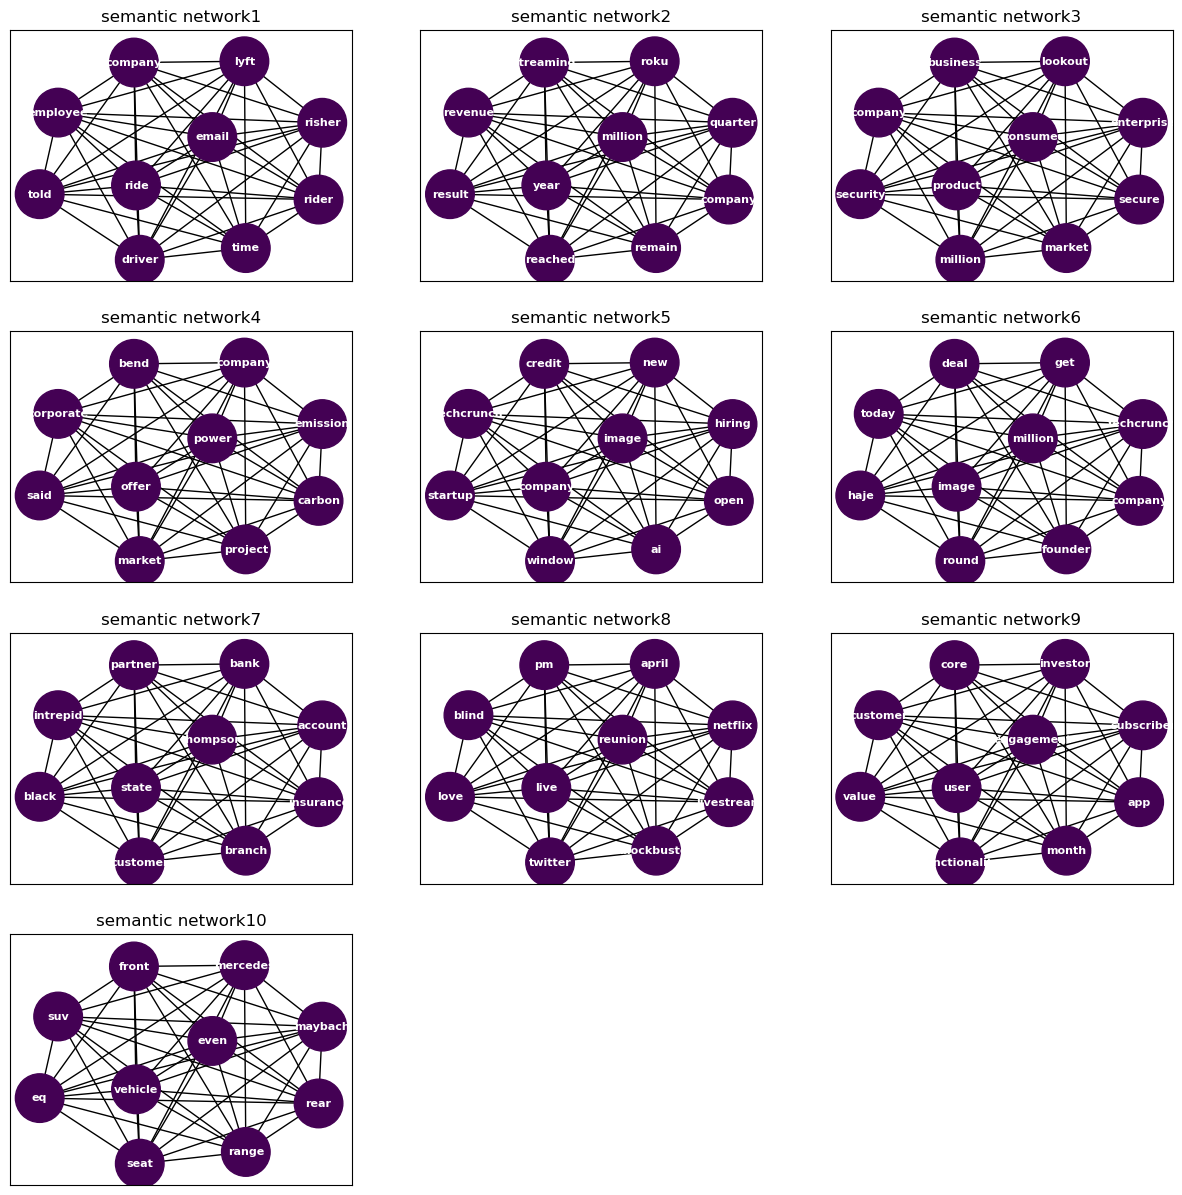

In [68]:
#function to create Semantic Networks of each news
def build_semantic_network(x, i, ax):
    vectorizer = CountVectorizer(max_features=10)
    document_vectors = vectorizer.fit_transform([x])
    feature_names = list(vectorizer.vocabulary_.keys())

    co_occurrence_matrix = np.dot(document_vectors.T, document_vectors)
    co_occurrence_matrix[co_occurrence_matrix > 1] = 1

    G = nx.from_numpy_array(co_occurrence_matrix)
    node_size = [v*1000 for v in nx.degree_centrality(G).values()]
    node_color = [v for v in nx.degree_centrality(G).values()]
    node_labels = {i: feature for i, feature in enumerate(feature_names)}

    
    pos = nx.spring_layout(G, seed=42)

    nx.drawing.nx_pylab.draw_networkx(G,node_size=node_size, node_color=node_color ,pos=pos,with_labels=True,
                                      labels=node_labels,font_size=8,font_color='white',font_weight='bold', ax=ax)

    ax.set_title('semantic network'+str(i+1))
    

temp_lst = df["P_text"].iloc[:10]    
n_rows = int(np.ceil(len(temp_lst)/3))   
fig, axs = plt.subplots(n_rows, ncols=3, figsize=(15, 15))
for i, ax in enumerate(axs.flatten()):
    if i < len(temp_lst):
        build_semantic_network(temp_lst.iloc[i], i, ax)
    else:
        ax.axis('off')
plt.show()

### explaination and colclusion:-

### Aim of semantic network is to get the words which are more frequeny as well as important for the article

### These graphs Provides information about the relationships between the words in a string by creating a semantic 
### network for each string in the input list.

### In particular, the semantic network shows which words occur together within the same context. 

### Each node represents a single word, and each edge represents the co-occurrence relationship between them. 

### Those nodes with more edges connecting them to other nodes may have a greater impact on the string's meaning.

### The purpose of this is to understand the meaning and structure of the text, as well as to identify key words or them.


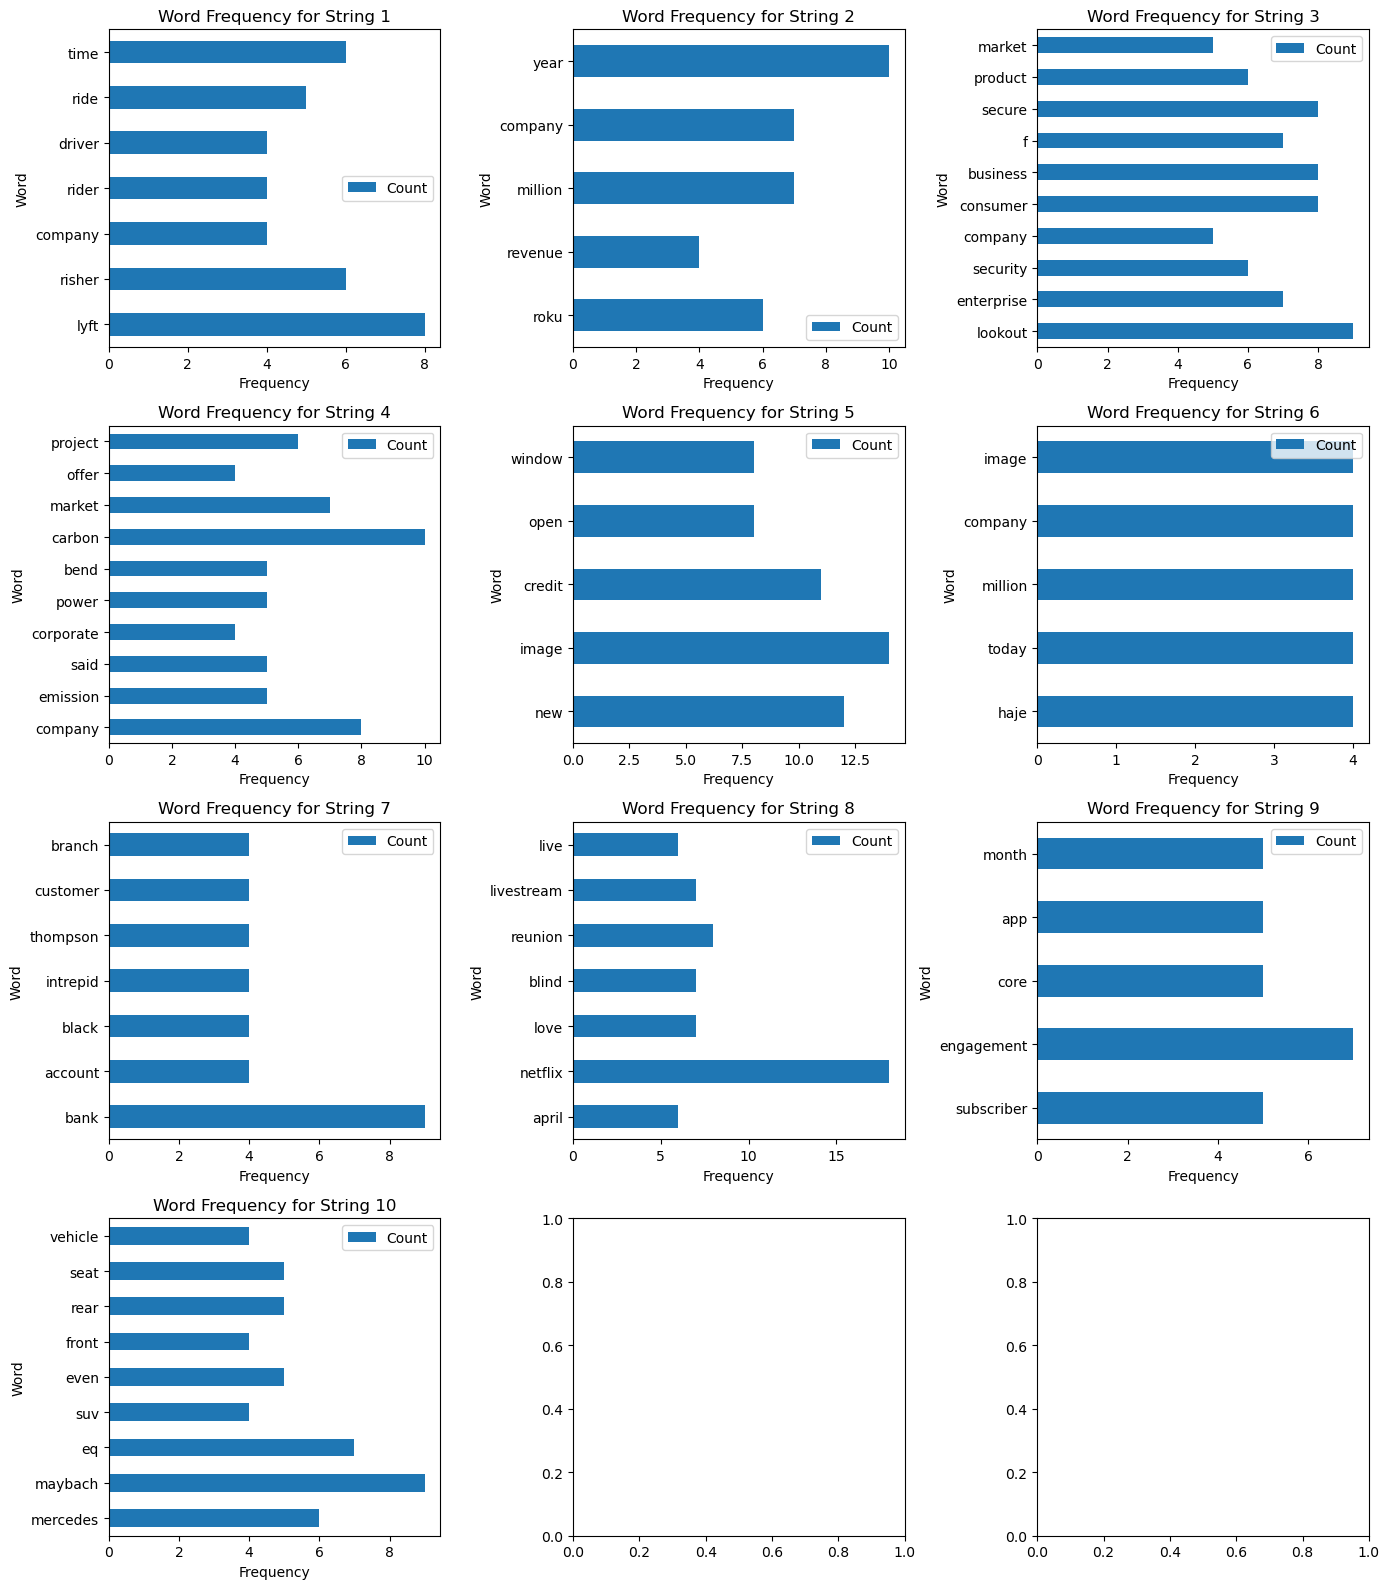

In [70]:
#visualization function to get count of the text per news article
def text_visualization(strings):
    n_rows = int(np.ceil(len(strings)/3))
    fig, axs = plt.subplots(n_rows, 3, figsize=(14, 4*n_rows), squeeze=False)

    for i, x in enumerate(strings):
        row_idx = i // 3
        col_idx = i % 3
        ax = axs[row_idx, col_idx]

        sentences = x
        #splitiing the words in the sentence passed
        word_lists = sentences.split()
        # Counting the frequency of each word in the word_lists
        freq = {}

        for word in word_lists:
            if word in freq:
                freq[word] += 1
            else:
                freq[word] = 1
        #selecting the words that occurs most frequently to display in the plot
        j = 2
        vocab = {word: freq for word, freq in freq.items() if freq > j}

        while ( len(vocab) > 10):
            j += 1
            vocab = {word: freq for word, freq in freq.items() if freq > j}

        df1 = pd.DataFrame(list(vocab.items()), columns=['Word', 'Count'])

        # Create a bar chart of the word frequencies
        df1.plot.barh(x='Word', y='Count', rot=0, ax=ax)

        # Set the chart title and axis labels
        ax.set_title(f'Word Frequency for String {i+1}')
        ax.set_xlabel('Frequency')
        ax.set_ylabel('Word')

    plt.tight_layout()
    plt.show()

text_visualization(df["P_text"].iloc[:10])

### explaination and colclusion

### In summary, this function provides a quick way to analyze the most frequently occurring words in a set of news articles, 
### and to compare the word frequencies across different articles.

In [72]:
stop_words = stopwords.words('english')
def get_doc_tokens(doc):
    tokens=[token.strip() \
            for token in nltk.word_tokenize(doc.lower()) \
            if token.strip() not in stop_words and\
               token.strip() not in string.punctuation]
    
    # you can add bigrams, collocations, stemming, 
    # or lemmatization here
    
    token_count={token:tokens.count(token) for token in set(tokens)}
    return token_count

def tfidf(docs):
    # step 2. process all documents to get list of token list
    docs_tokens={idx:get_doc_tokens(doc) \
             for idx,doc in enumerate(docs)}

    # step 3. get document-term matrix
    dtm=pd.DataFrame.from_dict(docs_tokens, orient="index" )
    dtm=dtm.fillna(0)
    dtm = dtm.sort_index(axis = 0)
      
    # step 4. get normalized term frequency (tf) matrix        
    tf=dtm.values
    doc_len=tf.sum(axis=1, keepdims=True)
    tf=np.divide(tf, doc_len)
    
    # step 5. get idf
    df=np.where(tf>0,1,0)
    #idf=np.log(np.divide(len(docs), \
    #    np.sum(df, axis=0)))+1

    smoothed_idf=np.log(np.divide(len(docs)+1, np.sum(df, axis=0)+1))+1    
    smoothed_tf_idf=tf*smoothed_idf
    
    return smoothed_tf_idf

Arr_TF_IDF = tfidf(df['P_text'])

In [73]:
Arr_TF_IDF

array([[0.01771868, 0.02544567, 0.01676418, ..., 0.        , 0.        ,
        0.        ],
       [0.00970521, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00663689, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00821845, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02087931, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02032985, 0.        , 0.        , ..., 0.02544528, 0.02544528,
        0.02544528]])

In [74]:
Arr_TF_IDF.shape

(1037, 21705)

## explaination and colclusion:-

### we have a total of 20 news articles that you have analyzed to create the TF-IDF matrix.

### Each news article has been converted into a vector of length 3084 based on the unique words across all the articles.

### The rows of the matrix represent the individual news articles, 

### The columns represent the unique words across all the articles.

### The values in each cell of the matrix represent the TF-IDF score of a particular word in a particular article.

### Overall, this matrix represents the TF-IDF scores of all the words across all the 20 news articles, 
### and it can be used for a variety of natural language processing tasks, such as text classification, clustering, 
### and information retrieval.

In [76]:
df = pd.read_csv('preprocessed_Articles.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,title,author,Date,text,P_text
0,0,0,Lyft to make ‘significant’ cuts across ride-ha...,['@kirstenkorosec'],"April 21, 2023",Lyft’s newly appointed CEO David Risher told e...,lyft newly appointed ceo david risher told emp...
1,1,1,Roku gains 1.6 million active streaming accoun...,['@aiishamalik1'],"April 26, 2023",Roku delivered its first-quarter results on We...,roku delivered first quarter result wednesday ...
2,2,2,Lookout sells its consumer cybersecurity busin...,['@psawers'],"April 26, 2023",Lookout’s long-running transition to becoming ...,lookout long running transition becoming enter...
3,3,3,Bend is taking on Brex and Ramp with a green t...,"['Tim De Chant', 'Alex Wilhelm']","May 3, 2023",When the SEC announced that it planned to requ...,sec announced planned require company purview ...
4,4,4,"TechCrunch+ roundup: 3 key hiring metrics, bui...",[],"March 31, 2023","The expense involved in recruiting, training a...",expense involved recruiting training onboardin...


In [77]:
main_text = df['text']
summary_arr = []

In [78]:
for i in main_text:
    #first need to split article in sentences using . split
    temp_sen_arr = i.split('.')
    
    #convertion of sentences in TFIDF cevtors
    vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
    X = vectorizer.fit_transform(temp_sen_arr) 
    
    #Decomposition using SVD(support vector decomposition)
    U, S, Vt = svds(X, k=2)
    
    #creation of sentences to vectors
    sentence_vectors = np.matmul(X.toarray(), Vt.T)
    
    #select the number of important sentences for summary here we are summarizing with top most 3 important sentences
    num_sentences = 3
    summary_indices = np.argsort(sentence_vectors.sum(axis=1))[::-1][:num_sentences]
    summary_indices.sort()
    summary = '. '.join([temp_sen_arr[i] for i in summary_indices])
    
    #append to summary array
    summary_arr.append(summary)

In [79]:
df['summary_using_LSA']=summary_arr

In [80]:
df.head()

,Unnamed: 0.1,Unnamed: 0,title,author,Date,text,P_text,summary_using_LSA
0,0,0,Lyft to make ‘significant’ cuts across ride-ha...,['@kirstenkorosec'],"April 21, 2023",Lyft’s newly appointed CEO David Risher told e...,lyft newly appointed ceo david risher told emp...,What’s less clear is how this might affect pr...
1,1,1,Roku gains 1.6 million active streaming accoun...,['@aiishamalik1'],"April 26, 2023",Roku delivered its first-quarter results on We...,roku delivered first quarter result wednesday ...,"6 million. Accordingly, we expect the adverti..."
2,2,2,Lookout sells its consumer cybersecurity busin...,['@psawers'],"April 26, 2023",Lookout’s long-running transition to becoming ...,lookout long running transition becoming enter...,"” For F-Secure, the deal gives it a stronger f..."
3,3,3,Bend is taking on Brex and Ramp with a green t...,"['Tim De Chant', 'Alex Wilhelm']","May 3, 2023",When the SEC announced that it planned to requ...,sec announced planned require company purview ...,"That lineup may change, of course. Brex, Ram..."
4,4,4,"TechCrunch+ roundup: 3 key hiring metrics, bui...",[],"March 31, 2023","The expense involved in recruiting, training a...",expense involved recruiting training onboardin...,Because it takes “about 15 touches for a pros...


In [81]:
nlp = English()

In [82]:
def textrank_summary(text, num_sentences=3):
    
    #first need to split article in sentences using . split
    sentences = text.split('. ')
    
    #convertion of sentences in TFIDF cevtors
    vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
    X = vectorizer.fit_transform(sentences)
    
    #creating cosine similarity matrix
    sim_matrix = cosine_similarity(X)
    
    #creating graph from the sim_matrix
    nx_graph = nx.from_numpy_array(sim_matrix)
    
    # Get the scores using the pagerank algorithm
    scores = nx.pagerank(nx_graph)
    
    # Sort the sentences by score and select the top sentences
    num_sentences = min(num_sentences, len(sentences))
    if num_sentences <= 0:
        return ''
    elif num_sentences == 1:
        return sentences[np.argmax(scores)]
    else:
        ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
        summary = '. '.join([ranked_sentences[i][1] for i in range(num_sentences)])
        return summary

In [83]:
summary_arr1 = []
for article in main_text:
    summary = textrank_summary(article)
    summary_arr1.append(summary)

In [84]:
len(summary_arr1)
df['summary_using_textrank']=summary_arr1

1037

In [85]:
df

,Unnamed: 0.1,Unnamed: 0,title,author,Date,text,P_text,summary_using_LSA,summary_using_textrank
0,0,0,Lyft to make ‘significant’ cuts across ride-ha...,['@kirstenkorosec'],"April 21, 2023",Lyft’s newly appointed CEO David Risher told e...,lyft newly appointed ceo david risher told emp...,What’s less clear is how this might affect pr...,Lyft’s newly appointed CEO David Risher told e...
1,1,1,Roku gains 1.6 million active streaming accoun...,['@aiishamalik1'],"April 26, 2023",Roku delivered its first-quarter results on We...,roku delivered first quarter result wednesday ...,"6 million. Accordingly, we expect the adverti...","Notably, the company revealed that it reached ..."
2,2,2,Lookout sells its consumer cybersecurity busin...,['@psawers'],"April 26, 2023",Lookout’s long-running transition to becoming ...,lookout long running transition becoming enter...,"” For F-Secure, the deal gives it a stronger f...",Lookout’s long-running transition to becoming ...
3,3,3,Bend is taking on Brex and Ramp with a green t...,"['Tim De Chant', 'Alex Wilhelm']","May 3, 2023",When the SEC announced that it planned to requ...,sec announced planned require company purview ...,"That lineup may change, of course. Brex, Ram...","Carbon credits are transacted through Patch, t..."
4,4,4,"TechCrunch+ roundup: 3 key hiring metrics, bui...",[],"March 31, 2023","The expense involved in recruiting, training a...",expense involved recruiting training onboardin...,Because it takes “about 15 touches for a pros...,"Thanks for reading, Walter Thompson\nEditorial..."
...,...,...,...,...,...,...,...,...,...
1032,1037,457,Cloud infrastructure revenue growth dips to 19...,['@ron_miller'],"April 28, 2023","As expected, companies are continuing to cut b...",expected company continuing cut back cloud spe...,Synergy’s chief analyst John Dinsdale says th...,"For the quarter, AWS continues to have 32% mar..."
1033,1038,458,"Amazon to shutter Book Depository, a UK-based ...",['@psawers'],"April 4, 2023","Amazon is set to shutter Book Depository, an o...",amazon set shutter book depository online book...,"Founded out of Gloucester, the U. K.","Founded out of Gloucester, the U.K., in 2004, ..."
1034,1039,459,"As another startup bank partner collapses, tec...","['Christine Hall', 'Mary Ann Azevedo', 'Natash...","May 2, 2023",When First Republic Bank was in its final mome...,first republic bank final moment silicon valle...,Part of the reason for that may be that we’ve...,He describes it as “one of those canonical ins...
1035,1040,460,‘The Witcher’ season 3 will debut this summer ...,['@aiishamalik1'],"April 25, 2023",Netflix has announced that the third season of...,netflix announced third season witcher premier...,twitter. S.,"Last summer, the streaming service split into ..."


In [86]:
rouge = Rouge()

In [87]:
#will find the difference between both the summaries 
scores_textrank = rouge.get_scores(summary_arr, summary_arr1, avg=True)
print('ROUGE-1: {:.2f}, ROUGE-2: {:.2f}, ROUGE-L: {:.2f}'.format(scores_textrank['rouge-1']['f']*100, 
                                                                  scores_textrank['rouge-2']['f']*100, 
                                                                  scores_textrank['rouge-l']['f']*100))

ROUGE-1: 20.75, ROUGE-2: 8.93, ROUGE-L: 19.13


In [97]:
df['text'][0]

'Lyft’s newly appointed CEO David Risher told employees in an email Friday that the company is significantly reducing its workforce as part of a restructuring effort. Risher said the restructuring is part of Lyft’s plan to “better meeting the needs of riders and drivers.” The company confirmed that it has not changed its guidance for the first quarter in spite of the upcoming layoffs. What’s less clear is how this might affect programs outside of ride-hailing such as its bike-sharing service. Lyft doesn’t employ drivers who use the ride-hailing app to pick up and drop off riders. Instead, the layoffs will be directed at the company’s more than 4,000 full-time employees. Employees will learn whether they have a job or not via an email that will be sent out April 27. Lyft wouldn’t disclose the number of people who will be cut. A WSJ report, citing unnamed sources, said about 1,200 workers, 30% of its total workforce, would be affected. Risher, a former retail executive at Amazon, took ov

In [98]:
df['summary_using_LSA'][0]

' What’s less clear is how this might affect programs outside of ride-hailing such as its bike-sharing service.  Lyft doesn’t employ drivers who use the ride-hailing app to pick up and drop off riders.  He listed a number of other products and services that could disappear, including Wait & Save, which allows riders in certain regions to pay a lower fare if they wait for the best-located driver'

In [99]:
df['summary_using_textrank'][0]

'Lyft’s newly appointed CEO David Risher told employees in an email Friday that the company is significantly reducing its workforce as part of a restructuring effort. Risher said the restructuring is part of Lyft’s plan to “better meeting the needs of riders and drivers.” The company confirmed that it has not changed its guidance for the first quarter in spite of the upcoming layoffs. Risher told TechCrunch in a late March interview that Lyft might drop its shared rides offering and make other changes to its business model in a bid to focus on its core ride-hailing business and become profitable'

In [88]:
#function for evaluation
def check_summary_quality(summary, article):
    #Tokenization
    summary_tokens = [word.lower() for word in word_tokenize(summary) if word.isalpha() and word.lower() not in stopwords.words('english')]
    
    #checking of speling errors
    spelling_errors = [word for word in summary_tokens if TextBlob(word).correct() != word]
    num_spelling_errors = len(spelling_errors)
    
    #calculate the polarity and subjectivity
    polarity, subjectivity = TextBlob(summary).sentiment    

    #calculate similarity
    vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
    X = vectorizer.fit_transform([summary, article])
    sim_matrix = cosine_similarity(X)
    similarity = sim_matrix[0, 1]
    return {
        'num_spelling_errors': num_spelling_errors,
        'polarity': polarity,
        'subjectivity': subjectivity,
        'similarity': similarity
    }

In [89]:
res=check_summary_quality(summary_arr1[0],main_text[0])

In [90]:
res

{'num_spelling_errors': 8,
 'polarity': 0.1766233766233766,
 'subjectivity': 0.5911255411255413,
 'similarity': 0.6261350322041572}

In [91]:
res=check_summary_quality(summary_arr[0],main_text[0])

In [92]:
res

{'num_spelling_errors': 2,
 'polarity': 0.0037698412698412703,
 'subjectivity': 0.3244047619047619,
 'similarity': 0.3757610499208025}

In [93]:
spelling_Error_LSA=[]
spelling_Error_TextRank=[]
polarity_LSA=[]
polarity_TextRank=[]
subjectivity_LSA=[]
subjectivity_TextRank=[]
similarity_LSA=[]
similarity_TextRank=[]
for i in range(200):
    res=check_summary_quality(summary_arr[i],main_text[i])
    spelling_Error_LSA.append(res['num_spelling_errors'])
    polarity_LSA.append(res['polarity'])
    subjectivity_LSA.append(res['subjectivity'])
    similarity_LSA.append(res['similarity'])
    
for i in range(200):
    res=check_summary_quality(summary_arr1[i],main_text[i])
    spelling_Error_TextRank.append(res['num_spelling_errors'])
    polarity_TextRank.append(res['polarity'])
    subjectivity_TextRank.append(res['subjectivity'])
    similarity_TextRank.append(res['similarity'])

In [94]:
lsa_spelling=sum(spelling_Error_LSA) / len(spelling_Error_LSA)
textrank_spelling=sum(spelling_Error_TextRank) / len(spelling_Error_TextRank)
lsa_polarity=sum(polarity_LSA) / len(polarity_LSA)
textrank_polarity=sum(polarity_TextRank) / len(polarity_TextRank)
lsa_subjectivity=sum(subjectivity_LSA) / len(subjectivity_LSA)
textrank_subjectivity=sum(subjectivity_TextRank) / len(subjectivity_TextRank)
lsa_similarity=sum(similarity_LSA) / len(similarity_LSA)
textrank_similarity=sum(similarity_TextRank) / len(similarity_TextRank)

print('**********spelling Errors**********')
print('Using LSA:- ',lsa_spelling)
print('Using TextRank:- ',textrank_spelling)
print('**********polarity**********')
print('Using LSA:- ',lsa_polarity)
print('Using TextRank:- ',textrank_polarity)
print('**********subjectivity**********')
print('Using LSA:- ',lsa_subjectivity)
print('Using TextRank:- ',textrank_subjectivity)
print('**********similarity**********')
print('Using LSA:- ',lsa_similarity)
print('Using TextRank:- ',textrank_similarity)

**********spelling Errors**********
Using LSA:-  3.09
Using TextRank:-  7.94
**********polarity**********
Using LSA:-  0.10883548963242147
Using TextRank:-  0.11304862555927453
**********subjectivity**********
Using LSA:-  0.3504240660508925
Using TextRank:-  0.4094399540271303
**********similarity**********
Using LSA:-  0.2515552151937292
Using TextRank:-  0.6019679662327588


<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Spelling Errors')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Polarity')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Subjectivity')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Similarity')

Text(0.5, 0.98, 'Summary Quality Evaluation')

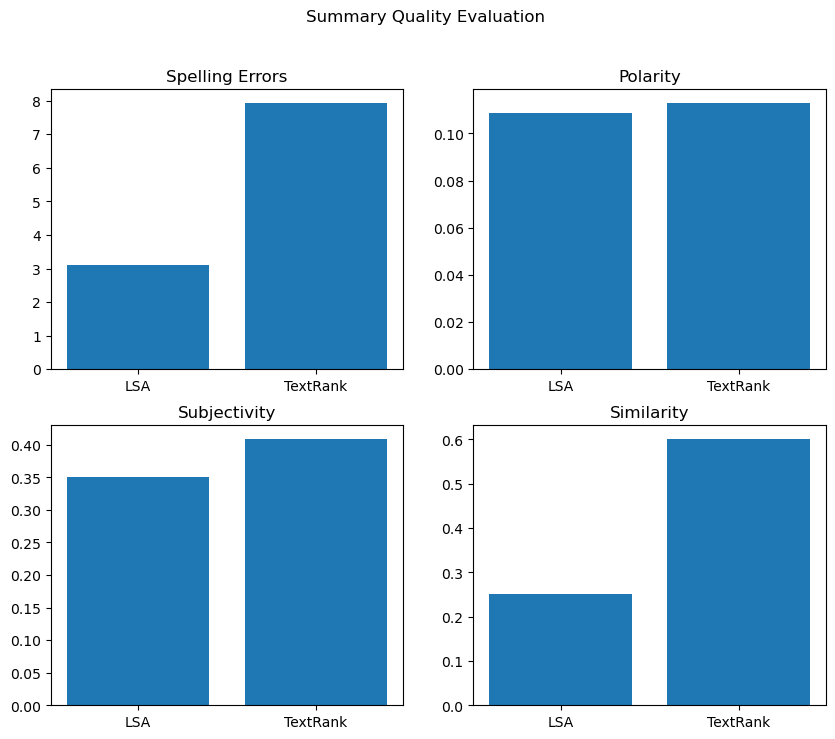

In [95]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

spelling_errors = [lsa_spelling, textrank_spelling]
labels = ['LSA', 'TextRank']
axs[0, 0].bar(labels, spelling_errors)
axs[0, 0].set_title('Spelling Errors')

polarity = [lsa_polarity, textrank_polarity]
axs[0, 1].bar(labels, polarity)
axs[0, 1].set_title('Polarity')

subjectivity = [lsa_subjectivity, textrank_subjectivity]
axs[1, 0].bar(labels, subjectivity)
axs[1, 0].set_title('Subjectivity')

similarity = [lsa_similarity, textrank_similarity]
axs[1, 1].bar(labels, similarity)
axs[1, 1].set_title('Similarity')

fig.suptitle('Summary Quality Evaluation')

plt.show()

In [96]:
df.to_csv("Final_summary.csv", index=False)